### DATA LOADING AND CLEANING

In [21]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [22]:
final = pd.read_csv('data/final_df.csv')
final.head()

,Unnamed: 0,hh_size,med_income,occ_units,med_rent,oo_hsng_units,perc_white,perc_non_white,perc_black,perc_owner_occ,...,Roof Material_nan,Repair Condition_1.0,Repair Condition_2.0,Repair Condition_3.0,Repair Condition_nan,Renovation_1.0,Renovation_2.0,Renovation_nan,threshold_high,threshold_medium
0,0,1.95,55160.5,236.0,873.0,117.0,0.574837,0.425163,0.234273,0.495763,...,0.801619,0.004049,0.190283,0.004049,0.801619,0.000000,0.0,1.000000,0,1
1,2,1.50,54297.0,1073.0,1071.0,327.0,0.663361,0.336639,0.249125,0.304753,...,0.924528,0.006289,0.069182,0.000000,0.924528,0.002096,0.0,0.997904,0,0
2,3,2.30,42778.0,712.0,1097.0,224.0,0.280774,0.719226,0.436694,0.314607,...,0.625442,0.000000,0.371025,0.003534,0.625442,0.000000,0.0,1.000000,0,1
3,4,2.69,39535.0,1424.0,1152.0,353.0,0.542930,0.457070,0.300637,0.247893,...,0.787551,0.000000,0.211096,0.001353,0.787551,0.000000,0.0,1.000000,0,1
4,5,2.99,52948.0,611.0,1023.0,114.0,0.465461,0.534539,0.326206,0.186579,...,0.694190,0.000000,0.305810,0.000000,0.694190,0.000000,0.0,1.000000,0,1


In [23]:
full_features = final.iloc[:, 1:-2]
threshold_medium = final.iloc[:, -1:]
threshold_high = final.iloc[:, -2:-1]

In [24]:
nans = []
for col in full_features.columns:
    if len(full_features.loc[full_features[col].isna()]) >= 1:
        nans.append(col)
for col in nans:
    full_features[col].fillna(full_features[col].median(), inplace=True)

### RANDOM FOREST

In [25]:
x_train, x_test, y_train, y_test =  train_test_split(full_features, threshold_high, 
                                                        test_size=0.2, random_state=0)

GRID = {'RF__n_estimators': [100, 1000, 5000], 'RF__criterion': ['gini', 'entropy'], 'RF__max_depth': [1, 3, 5], 
                      'RF__min_samples_split': [2,5,10], 'RF__random_state': [0]}

pipe = Pipeline([('RF', RandomForestClassifier())])
grid_model = GridSearchCV(estimator=pipe,
                          param_grid=GRID,
                          cv=10,
                          return_train_score=True,
                          refit='recall',
                          scoring=('accuracy', 'precision', 'recall')
)


grid_model = grid_model.fit(x_train, np.ravel(y_train))
predicted_y = grid_model.predict(x_test)
cv_results = pd.DataFrame(grid_model.cv_results_)
ranked_cv=cv_results.sort_values(by=['rank_test_recall'])
ranked_cv[['param_RF__n_estimators', 'param_RF__criterion', 'param_RF__max_depth', 'param_RF__min_samples_split', 'rank_test_accuracy',
           'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']]

,param_RF__n_estimators,param_RF__criterion,param_RF__max_depth,param_RF__min_samples_split,rank_test_accuracy,mean_test_accuracy,mean_test_precision,mean_test_recall
19,1000,gini,5,2,1,0.760669,0.645204,0.199154
24,100,gini,5,10,4,0.758836,0.635925,0.194450
22,1000,gini,5,5,6,0.758230,0.630767,0.192230
21,100,gini,5,5,14,0.756397,0.621483,0.192178
18,100,gini,5,2,17,0.755185,0.617306,0.189852
25,1000,gini,5,10,3,0.758843,0.644370,0.187579
48,100,entropy,5,5,2,0.759438,0.646655,0.185254
20,5000,gini,5,2,12,0.757010,0.628730,0.185201
51,100,entropy,5,10,9,0.757624,0.635850,0.180708
23,5000,gini,5,5,13,0.756404,0.629466,0.180603


In [26]:
x_train, x_test, y_train, y_test =  train_test_split(full_features, threshold_high, 
                                                        test_size=0.2, random_state=0)
best_high = RandomForestClassifier(criterion='gini', max_depth=5, min_samples_split=2,
                                    n_estimators=1000, random_state=0)
best_high = best_high.fit(x_train, np.ravel(y_train))
best_high_predicted = best_high.predict(x_test)

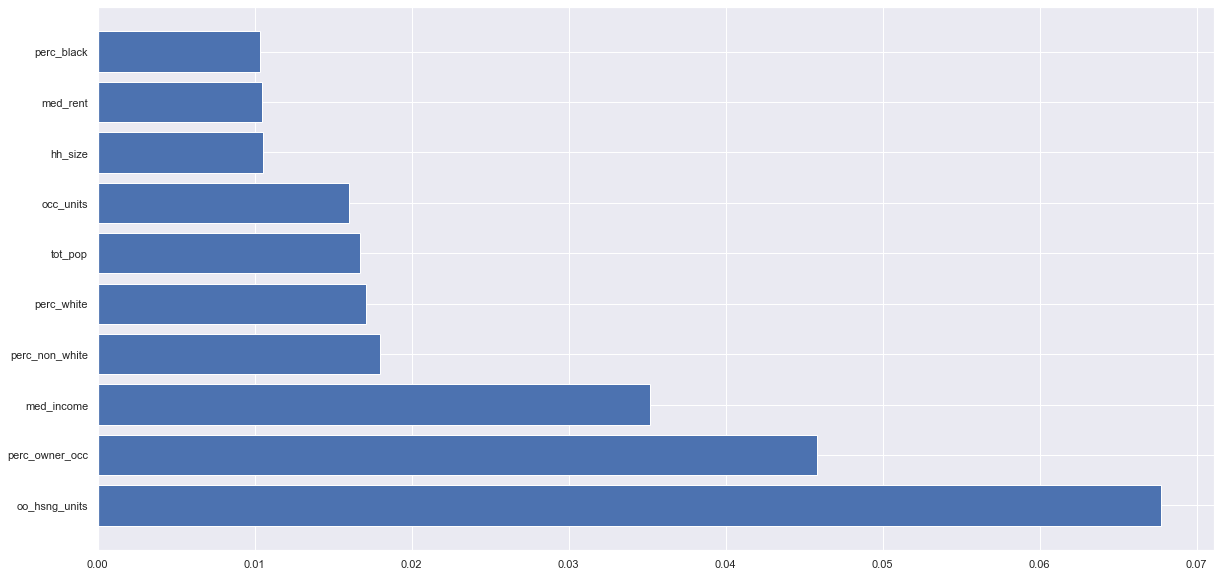

In [33]:
importances = best_high.feature_importances_[:10]

indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
labels = x_train.columns.values
names = [labels[i] for i in indices]

#len(importances)
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
plt.figure()
plt.barh(range(len(importances)),importances[indices])
plt.yticks(range(len(importances)), names)
plt.show()

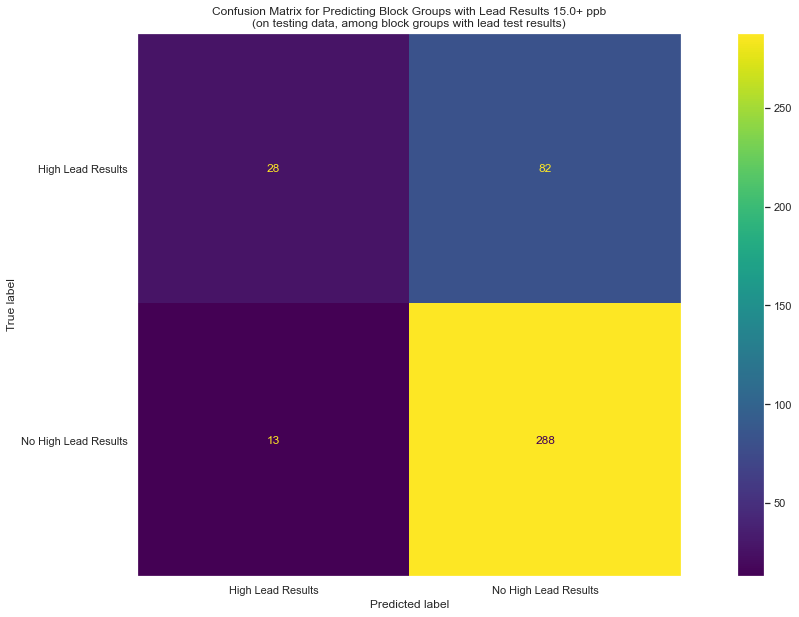


Test Accuracy: 0.7689
Test Precision: 0.6829
Test Recall: 0.2545



In [34]:
import matplotlib.pyplot as plt # Don't overwrite plt !
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score

cm = plot_confusion_matrix(
    estimator=best_high, 
    X=x_test, y_true=y_test, labels=[1,0], 
    display_labels=['High Lead Results', 'No High Lead Results'])
plt.grid(linestyle='')
plt.title('Confusion Matrix for Predicting Block Groups with Lead Results 15.0+ ppb\n' + 
         '(on testing data, among block groups with lead test results)')
plt.show()

accuracy = accuracy_score(y_true=y_test, y_pred=best_high_predicted)
precision = precision_score(y_true=y_test, y_pred=best_high_predicted)
recall = recall_score(y_true=y_test, y_pred=best_high_predicted)

print(f'''
Test Accuracy: {round(accuracy, 4)}
Test Precision: {round(precision, 4)}
Test Recall: {round(recall, 4)}
''')

### WEIGHTED RANDOM FOREST

In [35]:
x_train, x_test, y_train, y_test =  train_test_split(full_features, threshold_high, 
                                                        test_size=0.2, random_state=0)

GRID = {'RF__n_estimators': [100, 1000, 5000], 'RF__criterion': ['gini', 'entropy'], 'RF__max_depth': [1, 3, 5], 
                      'RF__min_samples_split': [2,5,10], 'RF__random_state': [0], 
                      'RF__class_weight': ['balanced', 'balanced_subsample']}

pipe = Pipeline([('RF', RandomForestClassifier())])
grid_model = GridSearchCV(estimator=pipe,
                          param_grid=GRID,
                          cv=10,
                          return_train_score=True,
                          refit='accuracy',
                          scoring=('accuracy', 'precision', 'recall')
)


grid_model = grid_model.fit(x_train, np.ravel(y_train))
predicted_y = grid_model.predict(x_test)
cv_results = pd.DataFrame(grid_model.cv_results_)
ranked_cv=cv_results.sort_values(by=['rank_test_recall'])
ranked_cv[['param_RF__n_estimators', 'param_RF__criterion', 'param_RF__max_depth', 'param_RF__min_samples_split', 
           'param_RF__class_weight', 'rank_test_recall', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']]

,param_RF__n_estimators,param_RF__criterion,param_RF__max_depth,param_RF__min_samples_split,param_RF__class_weight,rank_test_recall,mean_test_accuracy,mean_test_precision,mean_test_recall
83,5000,entropy,1,2,balanced_subsample,1,0.655325,0.416855,0.756818
89,5000,entropy,1,10,balanced_subsample,1,0.655325,0.416855,0.756818
86,5000,entropy,1,5,balanced_subsample,1,0.655325,0.416855,0.756818
32,5000,entropy,1,5,balanced,4,0.655928,0.416951,0.754493
35,5000,entropy,1,10,balanced,4,0.655928,0.416951,0.754493
...,...,...,...,...,...,...,...,...,...
25,1000,gini,5,10,balanced,104,0.707099,0.459504,0.648203
18,100,gini,5,2,balanced,105,0.708322,0.461964,0.641279
24,100,gini,5,10,balanced,106,0.706493,0.459671,0.638953
72,100,gini,5,2,balanced_subsample,107,0.712594,0.467072,0.636681


In [36]:
best_weighted = RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_split=2,
                                    n_estimators=5000, class_weight='balanced_subsample', random_state=0)
best_weighted = best_weighted.fit(x_train, y_train)
best_weight_predicted = best_weighted.predict(x_test)

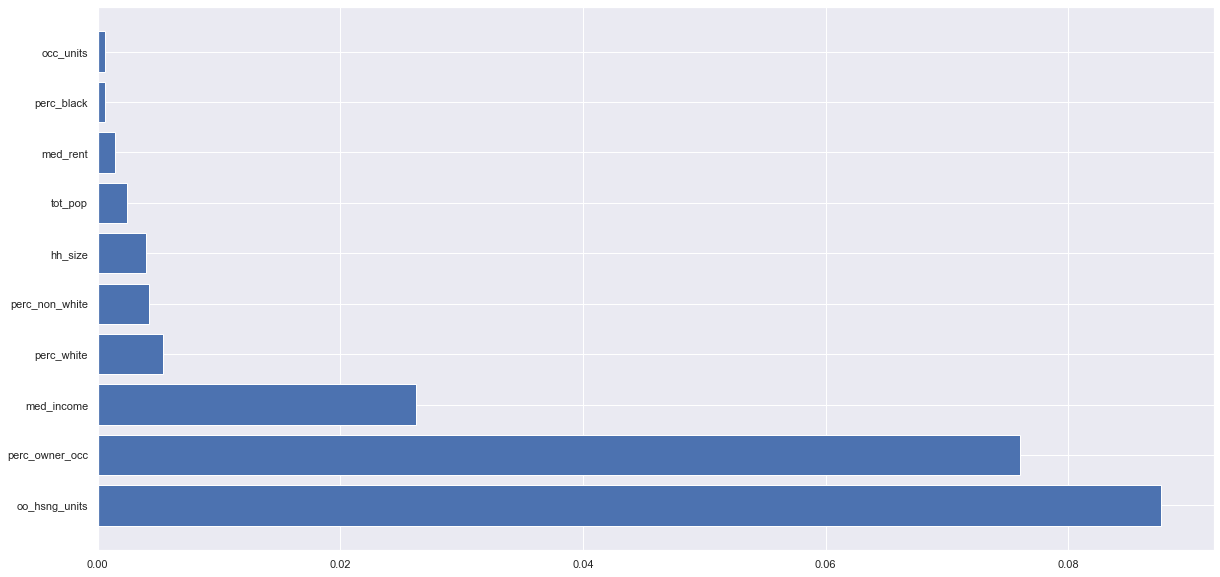

In [37]:
importances = best_weighted.feature_importances_[:10]

indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
labels = x_train.columns.values
names = [labels[i] for i in indices]

# Plot
sns.set(rc={'figure.figsize':(20, 10)})
plt.figure()
plt.barh(range(len(importances)),importances[indices])
plt.yticks(range(len(importances)), names)
plt.show()

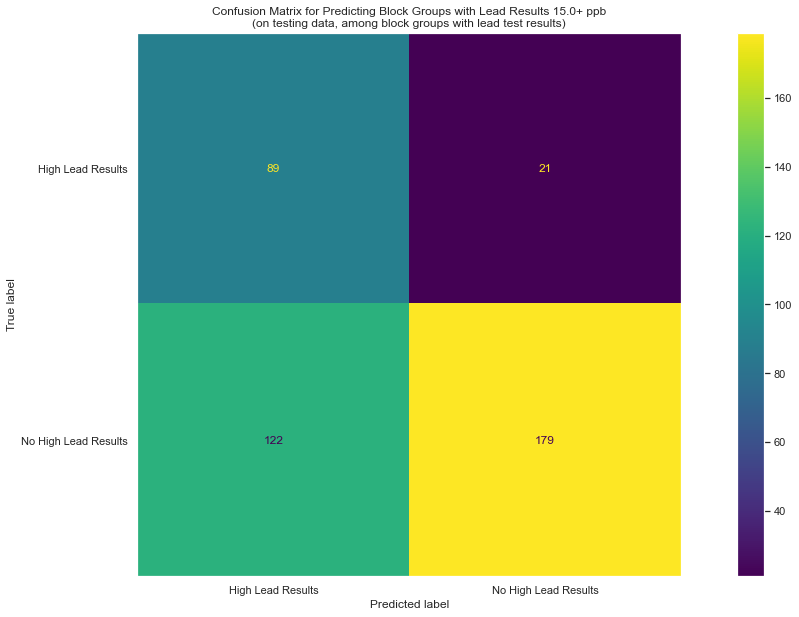


Test Accuracy: 0.6521
Test Precision: 0.4218
Test Recall: 0.8091



In [38]:
import matplotlib.pyplot as plt # Don't overwrite plt !
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score

cm = plot_confusion_matrix(
    estimator=best_weighted, 
    X=x_test, y_true=y_test, labels=[1,0], 
    display_labels=['High Lead Results', 'No High Lead Results'])
plt.grid(linestyle='')
plt.title('Confusion Matrix for Predicting Block Groups with Lead Results 15.0+ ppb\n' + 
         '(on testing data, among block groups with lead test results)')
plt.show()

accuracy = accuracy_score(y_true=y_test, y_pred=best_weight_predicted)
precision = precision_score(y_true=y_test, y_pred=best_weight_predicted)
recall = recall_score(y_true=y_test, y_pred=best_weight_predicted)

print(f'''
Test Accuracy: {round(accuracy, 4)}
Test Precision: {round(precision, 4)}
Test Recall: {round(recall, 4)}
''')

### RANDOM FOREST w/ SMOTE

In [39]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

x_train, x_test, y_train, y_test =  train_test_split(full_features, threshold_high, 
                                                        test_size=0.2, random_state=0)

GRID = {'RF__n_estimators': [100, 1000, 5000], 'RF__criterion': ['gini', 'entropy'], 'RF__max_depth': [1, 3, 5], 
                      'RF__min_samples_split': [2,5,10], 'RF__random_state': [0]}

pipe = Pipeline([('SM', SMOTE(random_state=0)),
                ('RF', RandomForestClassifier())])
grid_model = GridSearchCV(estimator=pipe,
                          param_grid=GRID,
                          cv=10,
                          return_train_score=True,
                          refit='recall',
                          scoring=('accuracy', 'precision', 'recall')
)


grid_model = grid_model.fit(x_train, np.ravel(y_train))
predicted_y = grid_model.predict(x_test)
cv_results = pd.DataFrame(grid_model.cv_results_)
ranked_cv=cv_results.sort_values(by=['rank_test_recall'])
ranked_cv[['param_RF__n_estimators', 'param_RF__criterion', 'param_RF__max_depth', 'param_RF__min_samples_split', 'rank_test_recall',
           'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']]


,param_RF__n_estimators,param_RF__criterion,param_RF__max_depth,param_RF__min_samples_split,rank_test_recall,mean_test_accuracy,mean_test_precision,mean_test_recall
27,100,entropy,1,2,1,0.668725,0.423458,0.699101
30,100,entropy,1,5,1,0.668725,0.423458,0.699101
33,100,entropy,1,10,1,0.668725,0.423458,0.699101
0,100,gini,1,2,4,0.670554,0.423503,0.682875
3,100,gini,1,5,4,0.670554,0.423503,0.682875
6,100,gini,1,10,4,0.670554,0.423503,0.682875
29,5000,entropy,1,2,7,0.666899,0.420754,0.678013
32,5000,entropy,1,5,7,0.666899,0.420754,0.678013
35,5000,entropy,1,10,7,0.666899,0.420754,0.678013
34,1000,entropy,1,10,10,0.668115,0.421757,0.677960


In [41]:
best_smote = RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_split=2,
                                    n_estimators=100, random_state=0)
best_smote = best_smote.fit(x_train, np.ravel(y_train))
best_smote_predicted = best_smote.predict(x_test)

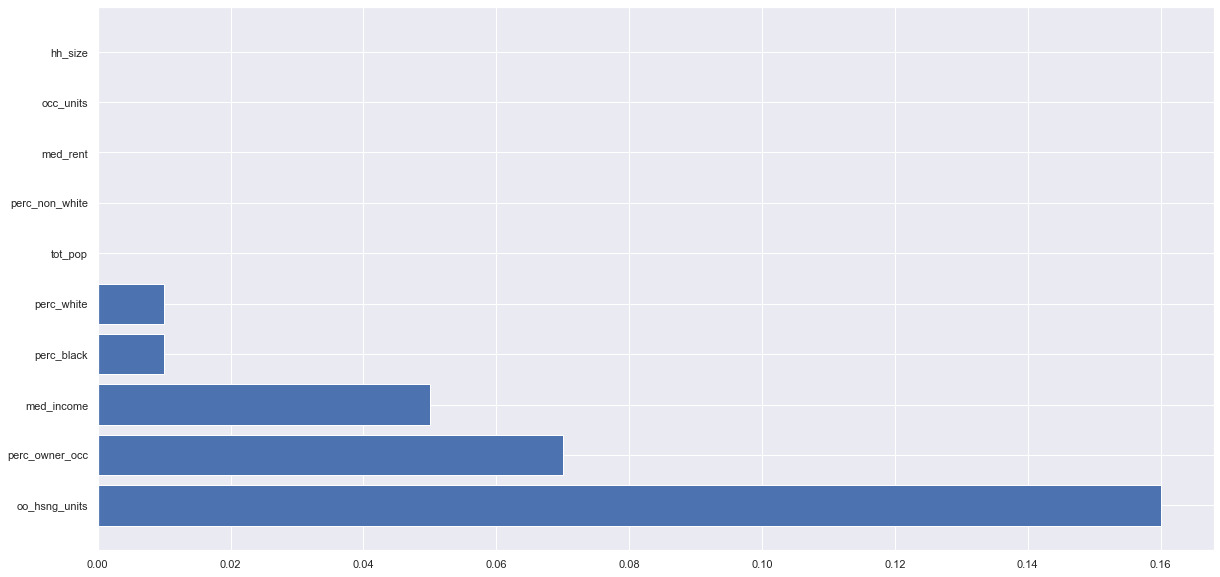

In [42]:
importances = best_smote.feature_importances_[:10]

indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
labels = x_train.columns.values
names = [labels[i] for i in indices]

# Plot
sns.set(rc={'figure.figsize':(20, 10)})
plt.figure()
plt.barh(range(len(importances)),importances[indices])
plt.yticks(range(len(importances)), names)
plt.show()

### POLICY RECOMMENDATIONS

In [16]:
#Model to be used for prioritization predictions
x_train, x_test, y_train, y_test =  train_test_split(full_features, threshold_high, 
                                                        test_size=0.2, random_state=0)
best_high = RandomForestClassifier(criterion='gini', max_depth=5, min_samples_split=2,
                                    n_estimators=1000, random_state=0)
best_high = best_high.fit(x_train, y_train)

<ipython-input-16-d79f32ae0fc4>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_high = best_high.fit(x_train, y_train)


In [43]:
full_data = pd.read_csv('data/final_assessments_block_group.csv', sep='\t')

block_geo = gpd.read_file('data/Boundaries - Census Blocks - 2010.geojson')
block_geo.head()
block_geo['Block Group'] = block_geo['geoid10'].map(lambda x: str(x)[:12])
bg_geo = block_geo.dissolve(by='Block Group')

full_data['GEOID'] = full_data['GEOID'].astype(str)
full_geo = full_data.iloc[:, 1:].merge(bg_geo.loc[:, "geometry"], left_on='GEOID', right_index=True)

geometries = pd.DataFrame(full_geo['geometry'], index=full_geo.index)
full_geo.drop(labels=['GEOID', 'geometry'], axis=1, inplace=True)

In [44]:
nans = []
for col in full_geo.columns:
    if len(full_geo.loc[full_geo[col].isna()]) >= 1:
        nans.append(col)
for col in nans:
    full_geo[col].fillna(full_geo[col].median(), inplace=True)

<AxesSubplot:title={'center':'Likelihood of Lead Pipes by Block Group'}>

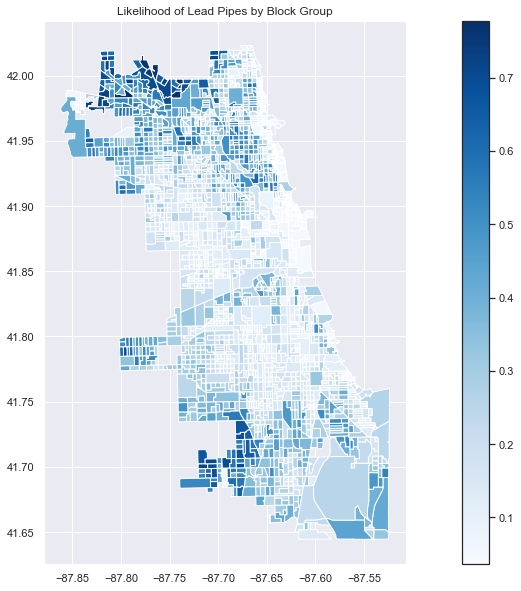

In [45]:
best_high_predict = best_high.predict_proba(full_geo)
for_map_rf = gpd.GeoDataFrame(pd.concat([geometries, pd.Series(best_high_predict[:,1])], axis=1))
for_map_rf.columns=['geometry', 'Likelihood of Lead Pipes']

fig, ax = plt.subplots(1, 1)
sns.set(rc={'figure.figsize':(12, 10)})
sns.set_theme(style="white")
plt.title("Likelihood of Lead Pipes by Block Group")
for_map_rf.plot(column='Likelihood of Lead Pipes', ax=ax, legend=True,  cmap='Blues')

<AxesSubplot:title={'center':'Likelihood of Lead Pipes by Block Group'}>

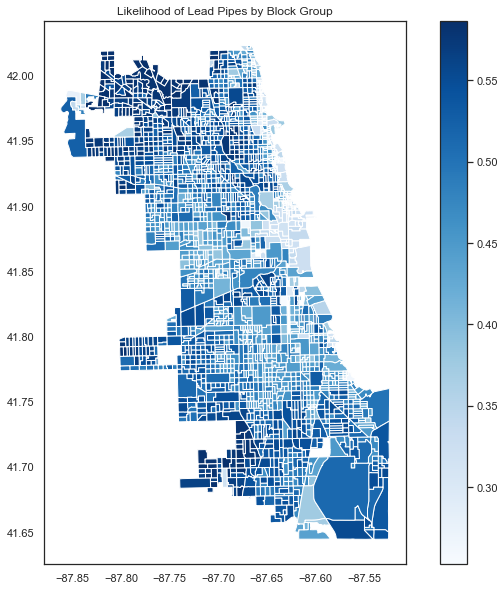

In [46]:
best_weighted_predict = best_weighted.predict_proba(full_geo)
for_map_weighted = gpd.GeoDataFrame(pd.concat([geometries, pd.Series(best_weighted_predict[:,1])], axis=1))
for_map_weighted.columns=['geometry', 'Likelihood of Lead Pipes']

fig, ax = plt.subplots(1, 1)
sns.set(rc={'figure.figsize':(12, 10)})
sns.set_theme(style="white")
plt.title("Likelihood of Lead Pipes by Block Group")
for_map_weighted.plot(column='Likelihood of Lead Pipes', ax=ax, legend=True,  cmap='Blues')

<AxesSubplot:title={'center':'Likelihood of Lead Pipes by Block Group'}>

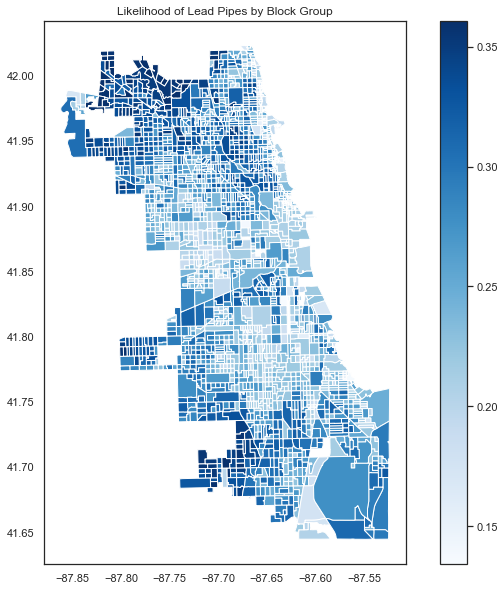

In [47]:
best_smote_predict = best_smote.predict_proba(full_geo)
for_map_smote = gpd.GeoDataFrame(pd.concat([geometries, pd.Series(best_smote_predict[:,1])], axis=1))
for_map_smote.columns=['geometry', 'Likelihood of Lead Pipes']

fig, ax = plt.subplots(1, 1)
sns.set(rc={'figure.figsize':(12, 10)})
sns.set_theme(style="white")
plt.title("Likelihood of Lead Pipes by Block Group")
for_map_smote.plot(column='Likelihood of Lead Pipes', ax=ax, legend=True,  cmap='Blues')